# Assignment 3 

# Part 1 - Basic Probability (3 points)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy

### 1.0 Histogram (0.5 points)

Before we start, we need a way of visualizing the data. Implement the `custom_histogram` function as follows:
  - **Inputs**: the `data` and the number of `bins`
  - **Output**: the number of `counts` in each bin, and the `bin_edges`, such that:
    - The bin `counts[i]` includes values that are greater or equal to `bin_edges[i]` and smaller than `bin_edges[i+1]`.
    - The last bin also counts the maximum value.
    - The first bin edge is the minimum value in the data, while the last bin edge is the maximum value.
    - The bins are equally spaced
  - **Density Parameter**: If the `density` parameter is set to True, scale the histogram to represent a probability density function (normalize each bin by the total area of the histogram, not by the total number of elements).

The output of your function (left) should be the same as that of `np.histogram()` (right).

**NOTE:** You are not allowed to use any external libraries in your implementation. This is true for all exercises, unless stated otherwise. If you need to use code from a previous cell you did not implement, then you're allowed to use an outside library to replace that missing part.


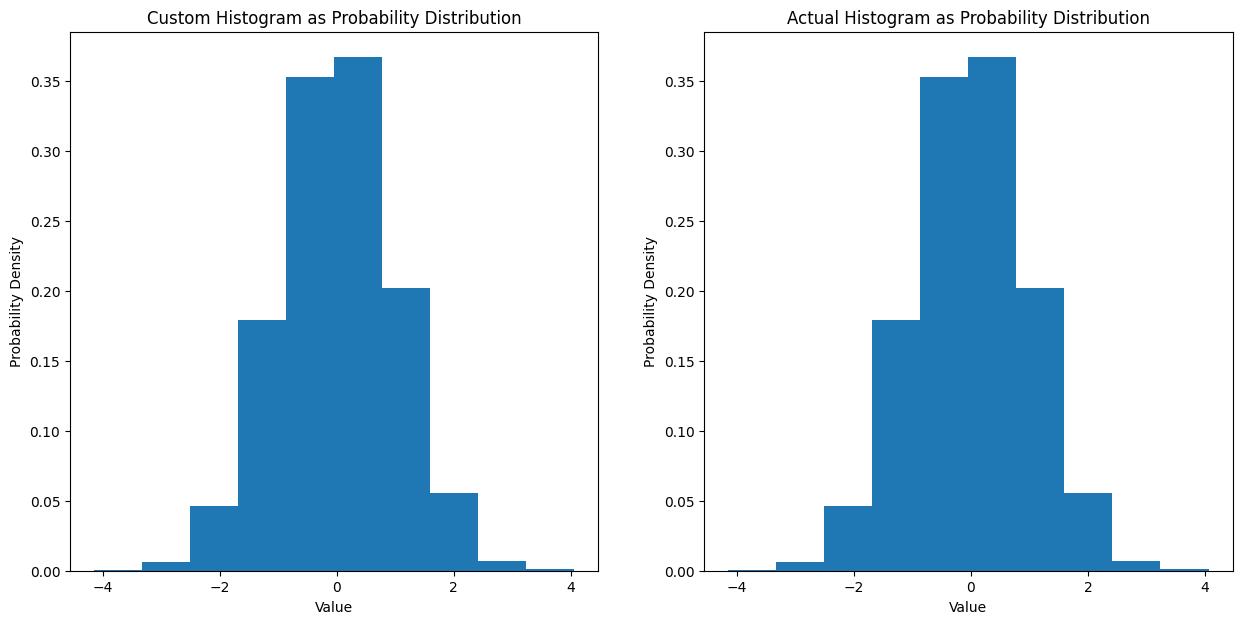

In [2]:
def custom_histogram(data, bins, density = False):
    """
    A custom function to compute histogram data without using np.histogram, with an option to scale the histogram
    to represent a probability distribution.
    
    Parameters:
    - data: array-like, the input data.
    - bins: int, the number of bins.
    - density: bool, if True, scale the histogram counts to represent a probability distribution.
    
    Returns:
    - counts: array of the counts in each bin, or the probability densities if density=True.
    - bin_edges: array of the bin edges.
    """
    counts = [0] * bins # create array of zeros
    bin_edges = [0] * (bins + 1)

    min_value = min(data)
    max_value = max(data)
    suma = sum(data)
    bin_size = (max_value-min_value)/bins

    bin_edges = [min_value + i*bin_size for i in range(bins+1)]
    for d in data:
        idx = bins - 1 if d == max_value else (int)((d-min_value)/bin_size)
        counts[idx] += 1
    
    scale = len(data) * bin_size

    if density:
        counts = [counts[i] / scale for i in range(len(counts))]

    return counts, bin_edges

# Example usage with density=True
samples = np.random.randn(10000)  # Generate some data
n_bins = 10  # Number of bins

# Generate histogram data with density scaling
hist, bin_edges = custom_histogram(samples, n_bins, density = True)

# Generate reference histogram data with density scaling, using NumPy
reference_hist, reference_bin_edges = np.histogram(samples, bins = n_bins, density = True)

# Plotting the histogram as a probability distribution
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
bin_centers = (np.diff(bin_edges) / 2 + bin_edges[:-1])
ax[0].bar(bin_centers, hist, width = np.diff(bin_centers)[0])
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Probability Density')
ax[0].set_title('Custom Histogram as Probability Distribution')

# Checking the answer using plt.hist() 
ax[1].hist(samples, bins = n_bins, density = True)
ax[1].set_xlabel('Value')
ax[1].set_ylabel('Probability Density')
ax[1].set_title('Actual Histogram as Probability Distribution')
plt.show()

assert len(hist) == len(reference_hist) and (np.abs(hist - reference_hist) < 1e-6).all() # histogram
assert len(bin_edges) == len(reference_bin_edges) and (np.abs(bin_edges - reference_bin_edges) < 1e-6).all() # bin edges


### 1.1 Uniform generator (0.3 points)

Construct and test your uniform number generator, by implementing the following functions:
* ```uniform_rv(start, end)``` - returns a random sample between ```start``` and ```end``` with **uniform probability** (using only [```random.random()```](https://docs.python.org/3/library/random.html#random.random)).
* ```uniform_rv_n(n_samples, start, end)``` - returns a list of ```n_samples``` that are drawn from a uniform distribution (using only ```uniform_rv(start, end)```).
* ```uniform_pdf(x, start, end)``` - returns the probability for a certain ```x``` value.

Note that you can also implement your own pseudo-number generator using linear congruential generator (LCG).

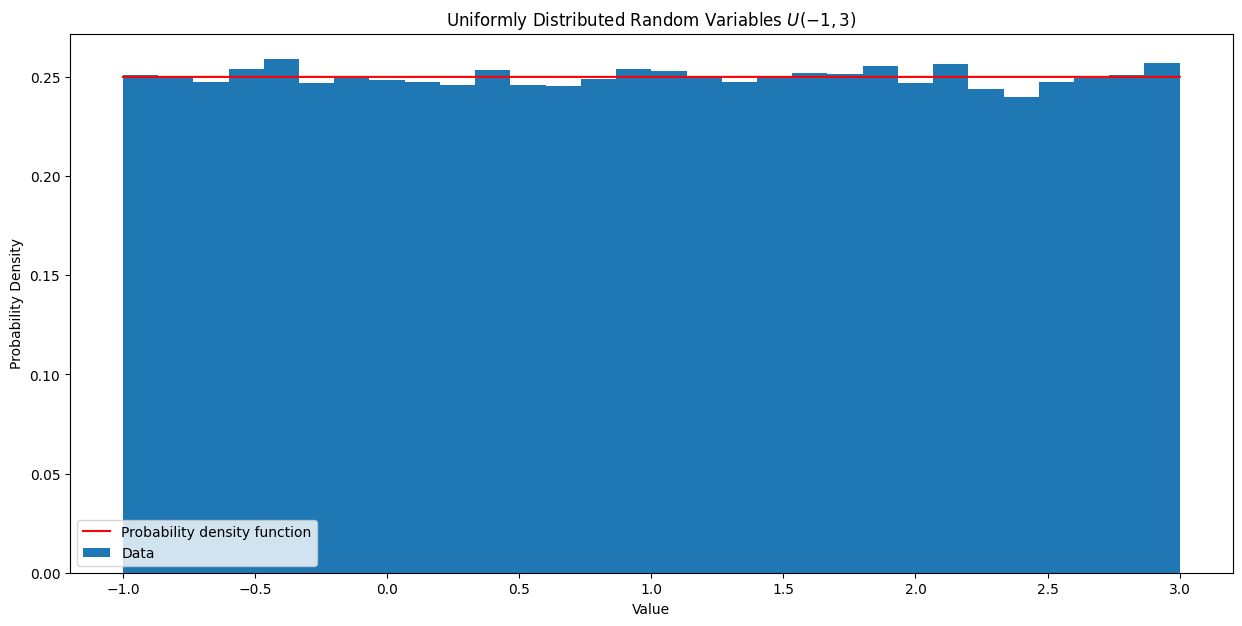

In [64]:
def uniform_rv(start = 0, end = 1):
    """
    Generate a single random variable that is uniformly distributed between start and end.

    Parameters:
    - start: float, the start of the interval.
    - end: float, the end of the interval.
    
    Returns:
    - float, the random variable.
    """
    return start + random.random() * (end-start)


def uniform_rv_n(n_samples, start = 0, end = 1):
    """
    Generate n_samples random variables that are uniformly distributed between start and end.

    Parameters:
    - n_samples (int): the number of samples.
    - start (float):  the start of the interval.
    - end (float): , the end of the interval.

    Returns:
    - list of floats, the random variables.
    """
    return [uniform_rv(start, end) for i in range(n_samples)]

def uniform_pdf(x, start, end):
    """
    Calculate the probability density function (PDF) of a uniform distribution at a given point x.

    Parameters:
    - x (float): The point at which to calculate the PDF.
    - start (float): The start of the interval.
    - end (float): The end of the interval.
    Returns:
    - float: The PMF value for the given parameters.
    """
    
    return 1/(end-start)
    
# Running Experiment
n_samples = 100000
start = -1
end = 3
samples = uniform_rv_n(n_samples, start = start, end = end)
n_bins = 30

# Generate histogram data with density scaling
hist, bin_edges = custom_histogram(samples, n_bins, density = True)

# Plotting the histogram as a probability distribution
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
bin_centers = (np.diff(bin_edges) / 2 + bin_edges[:-1]) # calculate the position of the bin ceters
ax.bar(bin_centers, hist, width = np.diff(bin_centers)[0], label = "Data") # plot the histogram

# Plot the density function
xx = np.linspace(min(samples), max(samples), 10000)
yy = [uniform_pdf(x, start, end) for x in xx] 
ax.plot(xx, yy, color = 'r', label = "Probability density function")
ax.set_xlabel('Value')
ax.set_ylabel('Probability Density')
ax.set_title(f'Uniformly Distributed Random Variables $U({start},{end})$')
ax.legend()
plt.show()

### 1.2. Bernoulli Distribution (0.3 points).

Construct and test a Bernoulli random variable generator, by implementing the following functions:
* ```bernoulli_rv(p)``` - returns a random sample from a Bernoulli distribution with parameter ```p``` (using only ```uniform_rv()```).
* ```bernoulli_rv_n(n_samples, p)``` - returns a list of ```n_samples``` that are drawn from a Bernoulli distribution with parameter ```p``` (using only ```bernoulli_rv(p)```).
* ```bernoulli_pdf(x, p)``` - returns the probability for a certain ```x``` value.

Note that in this case we do not scale by the total area of the histogram, but by the total number of elements. Why is that?

<div style="background: #f6e28b; padding: 20px"><br>

<b>WRITE YOUR ANSWER TO THE QUESTION ABOVE HERE (DOUBLE-CLICK TO EDIT)

<br></div>

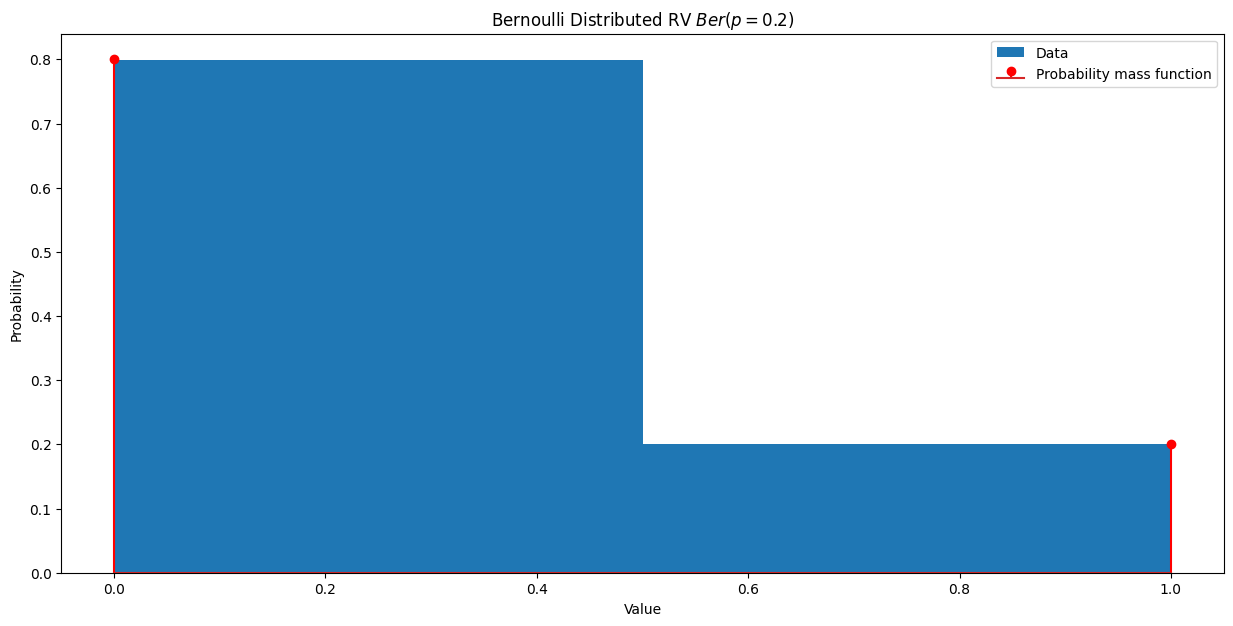

In [65]:
def bernoulli_rv(p):
    """
    Generate a single Bernoulli-distributed random variable.

    Parameters:
    - p (float): the probability of the random variable being 1.

    Returns:
    - int: 1 with probability p, 0 with probability 1-p.
    """
    return 1 if uniform_rv(0, 1)<= p else 0
    
def bernoulli_rv_n(n_samples, p):
    """
    Generate n_samples Bernoulli-distributed random variables.

    Parameters:
    - n_samples (int): the number of samples.
    - p (float): the probability of the random variable being 1.

    Returns:
    - list of ints: the random variables.
    """
    return [bernoulli_rv(p) for i in range(n_samples)]


def bernoulli_pmf(x, p):
    """
    Calculate the probability mass function (PMF) of a Bernoulli distribution at a given point x.
    
    Parameters:
    - x (int): The point at which to calculate the PMF.
    - p (float): The probability of the random variable being 1.

    Returns:
    - float: The PMF value for the given parameters.
    """
    return p if x==1 else 1-p 

# Run Experiment
n_samples = 100000
p = 0.2
samples = bernoulli_rv_n(n_samples, p) # Generate Bernoulli-distributed random variables
n_bins = 2 # the number of bins is always 2

# Generate histogram data 
hist, bin_edges = custom_histogram(samples, n_bins, density = False) # without density scaling

# Plotting the histogram as a mass function distribution
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
bin_centers = (np.diff(bin_edges) / 2 + bin_edges[:-1]) 
ax.bar(bin_centers, np.array(hist) / n_samples, width = np.diff(bin_centers)[0], label = 'Data')

# Plotting the real probability mass function
xx = [0,1]
yy = [bernoulli_pmf(x, p) for x in xx]
ax.stem(xx, yy, "r", label = 'Probability mass function')

# Set labels
ax.set_xlabel('Value')
ax.set_ylabel('Probability')
ax.set_title(f'Bernoulli Distributed RV $Ber(p={p})$')
ax.legend()
plt.show()

### 1.3 Binomial Distribution (0.3 points)

Construct and test a Binomial random variable generator, by implementing the following functions:
* ```binomial_rv(n, p)``` - returns a random sample from a Binomial distribution with parameters ```n``` and ```p``` (using only ```bernoulli_rv_n()```).
* ```binomial_rv_n(n_samples, n, p)``` - returns a list of ```n_samples``` that are drawn from a Binomial distribution with parameters ```n``` and ```p``` (using only ```binomial_rv(n, p)```).
* ```binomial_pdf(x, n, p)``` - returns the probability for a certain ```x``` value (you are allowed to use `scipy.special.comb` in your implementation).

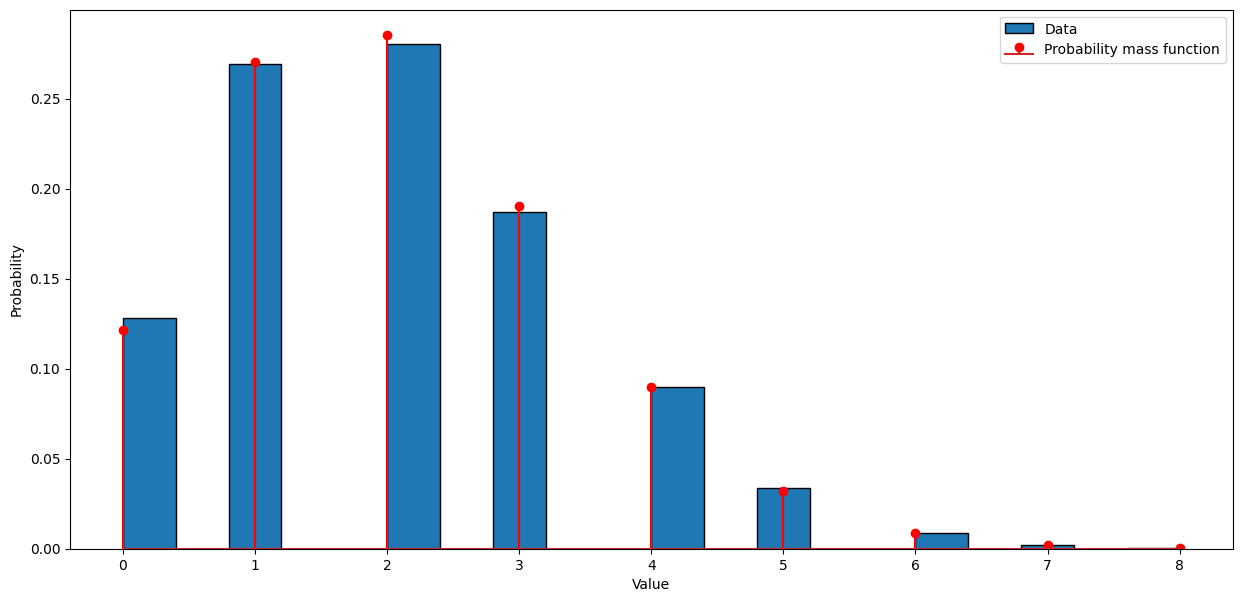

In [66]:
def f(n, e):
    return n*f(n-1,e) if n>e else 1

def ncr(n, r):
    return f(n,r)// f(n-r,1)


def binomial_rv(p, n):
    """
    Generate a single binomial-distributed random variable.

    Parameters:
    - p (float): the probability of the random variable being 1.
    - n (int): the number of trials.

    Returns:
    - int: the number of successes in n trials.
    """
    return sum(bernoulli_rv_n(n, p))

def binomial_rv_n(n_samples, p, n):
    """
    Generate n_samples binomial-distributed random variables.

    Parameters:
    - n_samples (int): the number of samples.
    - p (float): the probability of the random variable being 1.
    - n (int): the number of trials.

    Returns:
    - list of ints: the random variables.
    """
    return [binomial_rv(p, n) for i in range(n_samples)]

import math
def binomial_pmf(x, n, p):
    """
    Calculate the probability mass function (PMF) of a binomial distribution at a given point x.

    Parameters:
    - x (int): The point at which to calculate the PMF.
    - n (int): the number of trials.
    - p (float): the probability of the random variable being 1.

    Returns:
    - float: The PMF value for the given parameters.
    """
    #neviem ci mozme pouzit math library alebo si nakodit toto sami
    return math.comb(n,x)*pow(p, x)*pow(1-p, n-x)
    # return ncr(n,x)*pow(p, x)*pow(1-p, n-x)

# Run Experiment
p = 0.1
n = 20
n_samples = 10000
samples = binomial_rv_n(n_samples, p, n) # Generate binomial-distributed random variables
n_bins = n # we have one bin for each integer values

# Generate histogram data 
hist, bin_edges = custom_histogram(samples, n_bins, density = False) # without density scaling

# Plotting the histogram as a probability mass function
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
bin_centers = (np.diff(bin_edges) / 2 + bin_edges[:-1])
ax.bar(bin_centers, np.array(hist) / n_samples, width = np.diff(bin_centers)[0], edgecolor = 'black', label = "Data")

# Plotting the real probability mass function
xx = np.arange(int(min(samples)), int(max(samples)) + 1, 1)
yy = [binomial_pmf(x, n, p) for x in xx]
ax.stem(xx, yy, "r", label = r"Probability mass function")

# Set labels
ax.set_xlabel('Value')
ax.set_ylabel('Probability')

ax.legend()
plt.show()

### 1.4 Exponential Distribution (0.3 points)

Construct and test an Exponential random variable generator, by implementing the following functions:
* ```exp_rv(lambd)``` - returns a random sample from an Exponential distribution with parameter ```lambd``` (using only ```uniform_rv()```).
* ```exp_rv_n(n_samples, lambd)``` - returns a list of ```n_samples``` that are drawn from an Exponential distribution with parameter ```lambd``` (using only ```exp_rv(lambd)```).
* ```exp_pdf(x, lambd)``` - returns the probability for a certain ```x``` value.

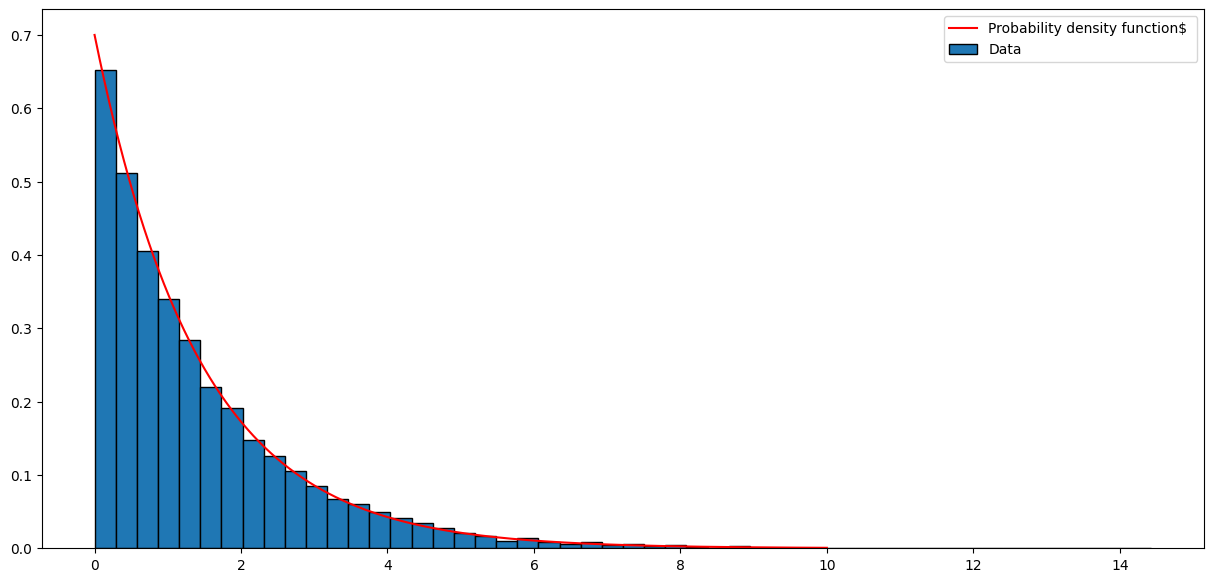

In [6]:
def exp_rv(lambd):
    """
    Generate a single exponentially-distributed random variable.

    Parameters:
    - lambd (float): the rate parameter.

    Returns:
    - float: the random variable.
    """
    return math.log(uniform_rv(0, 1))/(-lambd)

def exp_rv_n(n_samples, lambd):
    """
    Generate n_samples exponentially-distributed random variables.

    Parameters:
    - n_samples (int): the number of samples.
    - lambd (float): the rate parameter.

    Returns:
    - list of floats: the random variables.
    """
    return [exp_rv(lambd) for _ in range(n_samples)]

def exp_pdf(x, lambd):
    """
    Calculate the probability density function (PDF) of an exponential distribution at a given point x.

    Parameters:
    - x (float): The point at which to calculate the PDF.
    - lambd (float): The rate parameter.

    Returns:
    - float: The PDF value for the given parameters.
    """
    return lambd*math.exp(-x*lambd)

# Run Experiment
lambd = 0.7
n_samples = 10000
samples = exp_rv_n(n_samples, lambd) # Generate exponentially-distributed random variables
n_bins = 50

# Generate histogram data 
hist, bin_edges = custom_histogram(samples, n_bins, density = True) # with density scaling

# Plotting the histogram as a probability distribution
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
bin_centers = (np.diff(bin_edges) / 2 + bin_edges[:-1])
ax.bar(bin_centers, hist, width = np.diff(bin_centers)[0], edgecolor = 'black', label = "Data")

# Plotting the actual probability density function
xx = np.linspace(0, 10, 10000)
yy = [exp_pdf(x, lambd) for x in xx]
ax.plot(xx, yy, color = "r", label = "Probability density function$ ")
ax.legend()
plt.show()

### 1.5 Poisson Distribution (0.3 points)

Construct and test a Poisson random variable generator, by implementing the following functions:
* ```poisson_rv(lambd)``` - returns a random sample from a Poisson distribution with parameter ```lambda``` (using only ```exp_rv(lambd)```).
* ```poisson_rv_n(n_samples, lambd)``` - returns a list of ```n_samples``` that are drawn from a Poisson distribution with parameter ```lambd``` (using only ```poisson_rv(lambd)```).
* ```poisson_pmf(x, lambd)``` - returns the probability for a certain ```x``` value (using only ```np.math.factorial(x)```).

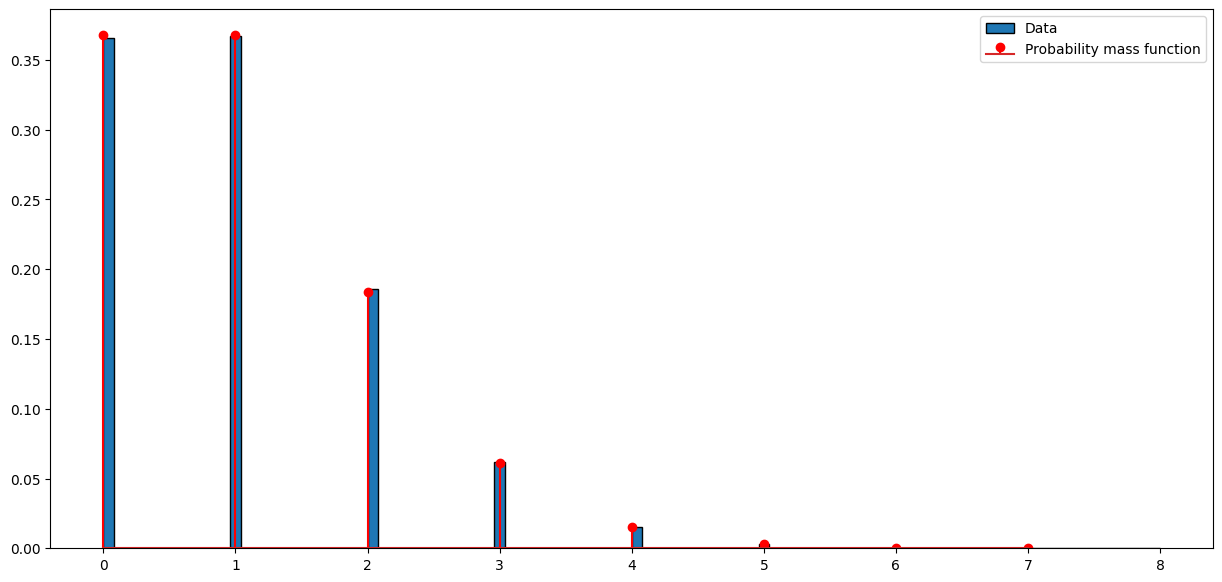

In [11]:
def poisson_rv(lambd):
    """
    Generate a single Poisson-distributed random variable.

    Parameters:
    - lambd (float): the rate parameter.

    Returns:
    - int: the random variable.
    """
    k = 0
    t = 0
    while True:
        t += exp_rv(lambd)
        if t >= 1:
            break
        k += 1
    return k

def poisson_rv_n(n_samples, lambd):
    """
    Generate n_samples Poisson-distributed random variables.

    Parameters:
    - n_samples (int): the number of samples.
    - lambd (float): the rate parameter.

    Returns:
    - list of ints: the random variables.
    """
    return [poisson_rv(lambd) for i in range(n_samples)]
    

def poisson_pmf(x, lambd):
    """
    Calculate the probability mass function (PMF) of a Poisson distribution at a given point x.

    Parameters:
    - x (int): The point at which to calculate the PMF.
    - lambd (float): The rate parameter.

    Returns:
    - float: The PMF value for the given parameters.
    """
    return (np.exp(-lambd) * lambd ** x) / np.math.factorial(x)

# Run Experiment
n_samples = 100000
lambd = 1
samples = poisson_rv_n(n_samples, lambd) # Generate Poisson-distributed random variables
n_bins = 100

# Generate histogram data 
hist, bin_edges = custom_histogram(samples, n_bins, density = False) # without density scaling

# Plotting the histogram as a probability distribution
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
bin_centers = (np.diff(bin_edges) / 2 + bin_edges[:-1])
ax.bar(bin_centers, np.array(hist) / n_samples, width = np.diff(bin_centers)[5], edgecolor = 'black', label = "Data")

# Plotting the actual probability density function
xx = np.arange(min(samples), max(samples))
yy = [poisson_pmf(x, lambd) for x in xx]
ax.stem(xx, yy, "r", label = "Probability mass function")
ax.legend()
plt.show()

###  1.6. Normal Distribution (0.5 points)

Construct and test a Normal random variable generator, by implementing the following functions:
* ```normal_rv(mean, var)``` - returns a random sample from a Normal distribution with parameters ```mean``` and ```var``` by simulating random variables in pairs with transition to polar coordinates(using only ```uniform_rv()```).
* ```normal_rv_n(n_samples, mean, var)``` - returns a list of ```n_samples``` that are drawn from a Normal distribution with parameters ```mean``` and ```var``` (using only ```normal_rv(mean, var)```).
* ```normal_pdf(x, mean, var)``` - returns the probability for a certain ```x``` value.


**Hint**: Use the Box-Muller transform.


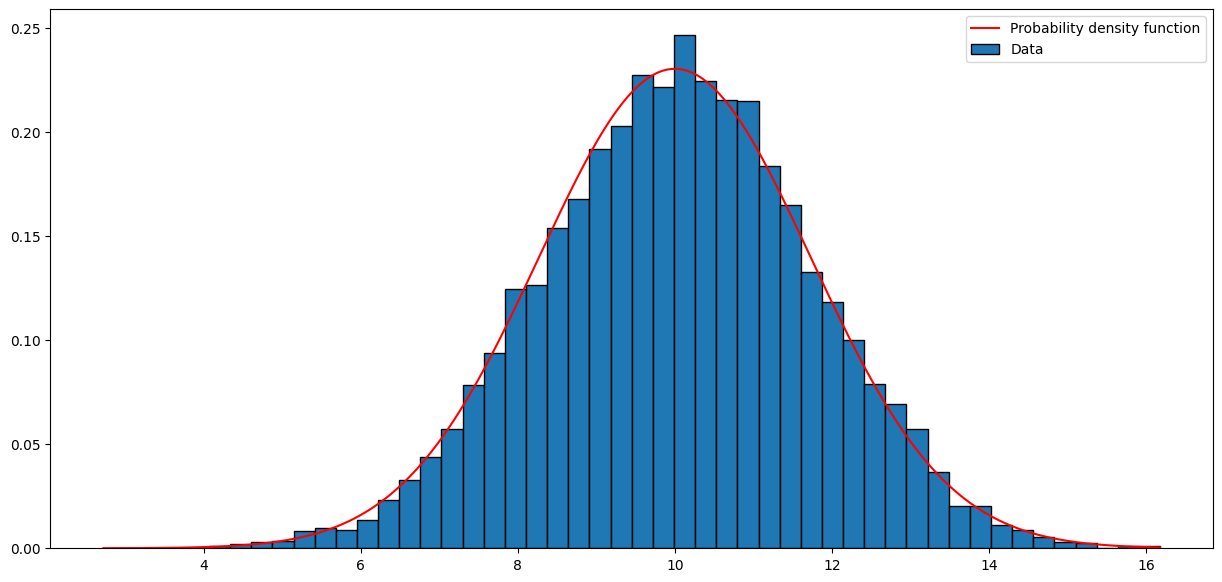

In [13]:
def normal_rv(mean,var):
    """
    Generate a single normally-distributed random variable using polar coordinates.

    Parameters:
    - mean (float): the mean of the distribution.
    - var (float): the variance of the distribution.

    Returns:
    - float: the random variable.
    """
    u1 = uniform_rv()
    u2 = uniform_rv()

    z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z = mean + np.sqrt(var) * z0
    return z

def normal_rv_n(n_samples,mean,var):
    """
    Generate n_samples normally-distributed random variables using polar coordinates.

    Parameters:
    - n_samples (int): the number of samples.
    - mean (float): the mean of the distribution.
    - var (float): the variance of the distribution.

    Returns:
    - list of floats: the random variables.
    """
    return [normal_rv(mean, var) for _ in range(n_samples)]
    
def normal_pdf(x, mean, var):
    """
    Calculate the probability density function (PDF) of a normal distribution at a given point x.

    Parameters:
    - x (float): The point at which to calculate the PDF.
    - mean (float): The mean of the distribution.
    - var (float): The variance of the distribution.

    Returns:
    - float: The PDF value for the given parameters.
    """
    return (1 / np.sqrt(2 * np.pi * var)) * np.exp(-0.5 * ((x - mean) ** 2) / var)


# Run Experiment
n_samples = 10000
mean = 10
var = 3
samples = normal_rv_n(n_samples, mean, var) # Generate normally-distributed random variables
n_bins = 50

# Generate histogram data 
hist, bin_edges = custom_histogram(samples, n_bins, density=True) # with density scaling

# Plotting the histogram as a probability distribution
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
bin_centers = (np.diff(bin_edges) / 2 + bin_edges[:-1])
ax.bar(bin_centers, hist, width = np.diff(bin_centers)[0], edgecolor = 'black', label = "Data")

# Plotting the actual probability density function
xx = np.linspace(min(samples), max(samples), 10000)
yy = [normal_pdf(x, mean, var) for x in xx]
ax.plot(xx, yy, color = "r", label = "Probability density function")
ax.legend()
plt.show()

### 1.7 Chi-squared Distribution (0.5 points)

Construct and test a $\chi^2$ random variable generator, by implementing the following functions:
* ```chi_squared_rv(k)``` - returns a random sample from a $\chi^2$ distribution with `k` degrees of freedom (using only ```normal_rv_n()```).
* ```chi_squared_rv_n(n_samples, k)``` - returns a list of `n_samples` that are drawn from a $\chi^2$ distribution with `k` degrees of freedom (using only ```chi_squared_rv(k)```).
* ```chi_squared_pdf(x, k)``` - returns the probability for a certain `x` value (you are allowed to use ```scipy.stats.gamma()``` in your implementation).

**Hint:** Chi-distribution can be expressed as a sum of normally distributed variables.

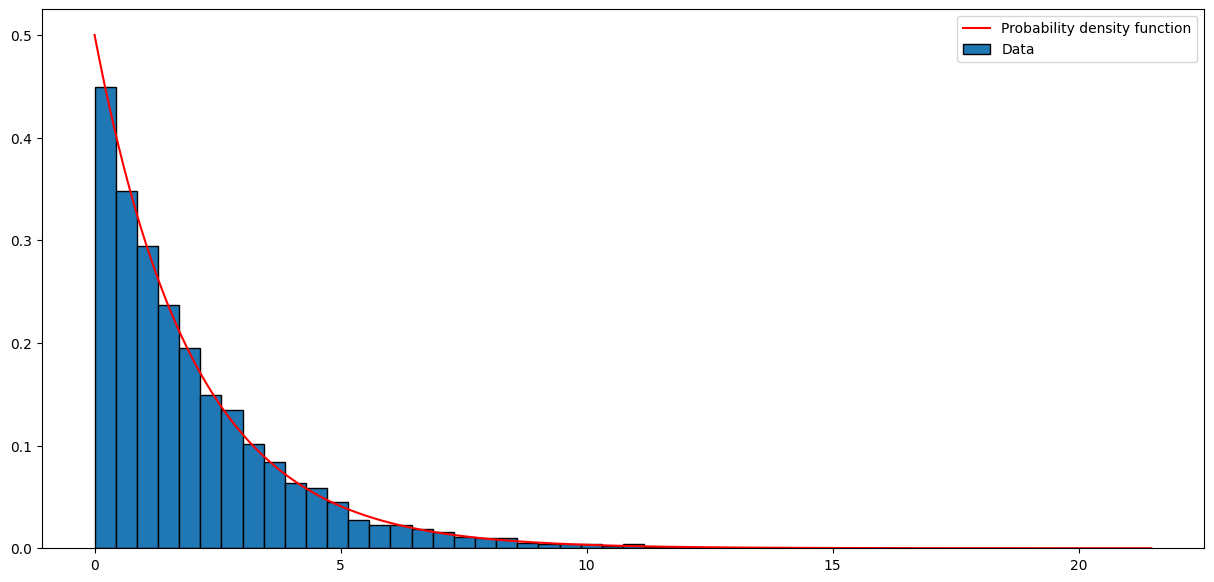

In [18]:
from scipy.stats import gamma
def chi_squared_rv(k):
    """
    Generate a single random variable from a chi squared distribution.

    Parameters:
    - k (int): the number of degrees of freedom.

    Returns:
    - float: the random variable.
    """
    samples = normal_rv_n(k, 0, 1)  # Generate k standard normal variables
    chi_squared_sample = sum(x**2 for x in samples)  # Calculate the sum of squares
    return chi_squared_sample

def chi_squared_rv_n(n_samples, k):
    """
    Generate n_samples random variables from a chi squared distribution.

    Parameters:
    - n_samples (int): the number of samples.
    - k (int): the number of degrees of freedom.

    Returns:
    - list of floats: the random variables.
    """
    return [chi_squared_rv(k) for _ in range(n_samples)]


def chi_squared_pdf(x, k):
    """
    Calculate the probability density function (PDF) of a chi squared distribution at a given point x.

    Parameters:
    - x (float): The point at which to calculate the PDF.
    - k (int): The number of degrees of freedom.

    Returns:
    - float: The PDF value for the given parameters.
    """
    shape = k / 2
    scale = 2
    return gamma.pdf(x, shape, scale=scale)

# Run Experiment
n_samples = 10000
k = 2
samples = chi_squared_rv_n(n_samples, k)
n_bins = 50

# Generate histogram data 
hist, bin_edges = custom_histogram(samples, n_bins, density = True) # with density scaling

# Plotting the histogram as a probability distribution
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
bin_centers = (np.diff(bin_edges) / 2 + bin_edges[:-1])
ax.bar(bin_centers, hist, width = np.diff(bin_centers)[0], edgecolor = 'black', label = "Data")

# Plotting the actual probability density function
xx = np.linspace(min(samples), max(samples), 10000)
yy = [chi_squared_pdf(x, k) for x in xx]
ax.plot(xx, yy, color = "r", label = "Probability density function")
ax.legend()
plt.show()

## 2. Experiments (2.5 points)

### 2.1. Coin Flip Experiment (0.5 points)

Consider the game of flipping a coin, an endless sequence of independent trials with the flip of the fair coin. Let us define by $X_1, X_2 \dots X_N$ a sequence of independent identically distributed random variables, each of which takes on values 1 if in the corresponding trial the tail is drawn, and −1 otherwise (with probability = 1/2). Denote the total gain by $S_n = X_1 + X_2 + . . . + X_n$. Perform $N = 1000$ trials and plot multiple realizations of the process $S_n$ at $n = 0, 1, . . . , N$. 

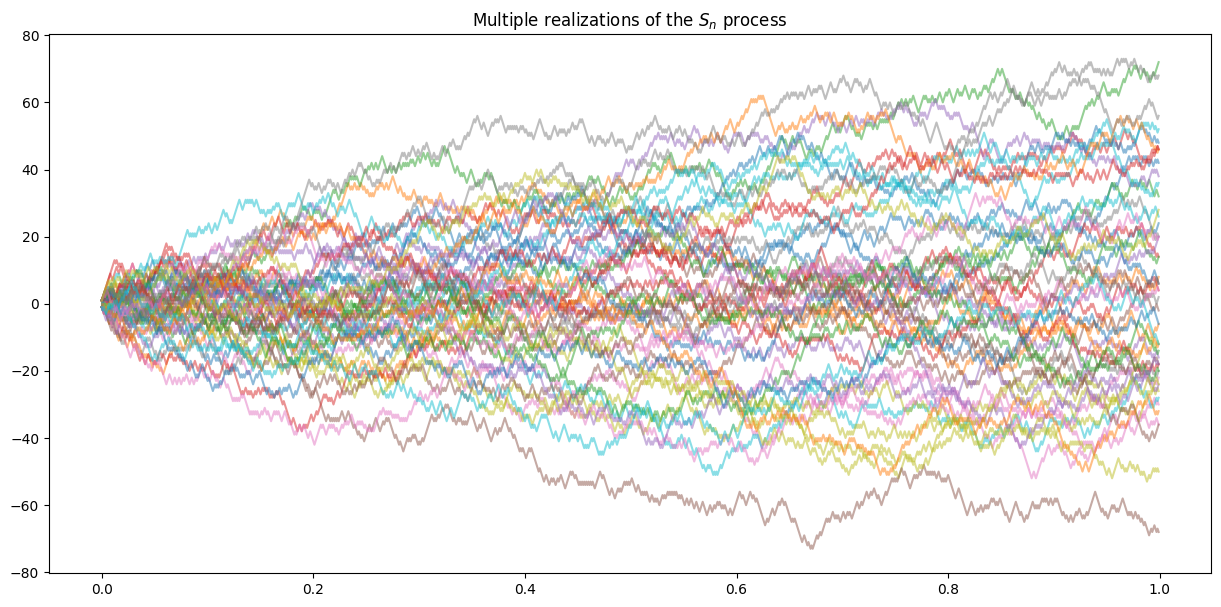

In [22]:
def coinToss():
    """
    Simulate a single coin toss game,.

    Returns:
    - int: the random variable X_i - 1 if heads, -1 if tails
    """
    return 1 if bernoulli_rv(0.5) == 1 else -1

def coinTossGame(n):
    """
    Simulate a coin toss game with n rounds.

    Parameters:
    - n (int): the number of rounds.

    Returns:
    - list of ints: [S1, S2, S3, ...] - the cumulative sum of the game at each round.
    """
    Sn = [0] * n
    for i in range(n):
        b = coinToss()
        if i==0:
            Sn[i] = b
        else:
            Sn[i] = b + Sn[i-1]
    return Sn

# Run Experiment
n = 1000
n_experiments = 50
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
for i in range(n_experiments):
    Sn = coinTossGame(n)
    ax.plot(np.arange(0, 1, 1 / n), Sn, alpha = 0.5)
ax.set_title(r"Multiple realizations of the $S_n$ process")
plt.show()

### 2.1.2. Law of large numbers (0.5 points)

Verify empirically the law of large numbers using your coinToss game, i.e. investigate the behavior of the process $X(n) = S_n/n$. What happens as `n` increases? How does this demonstrate the law of large numbers?

<div style="background: #f6e28b; padding: 20px"><br>

<b>WRITE YOUR ANSWER TO THE QUESTION ABOVE HERE (DOUBLE-CLICK TO EDIT)

<br></div>

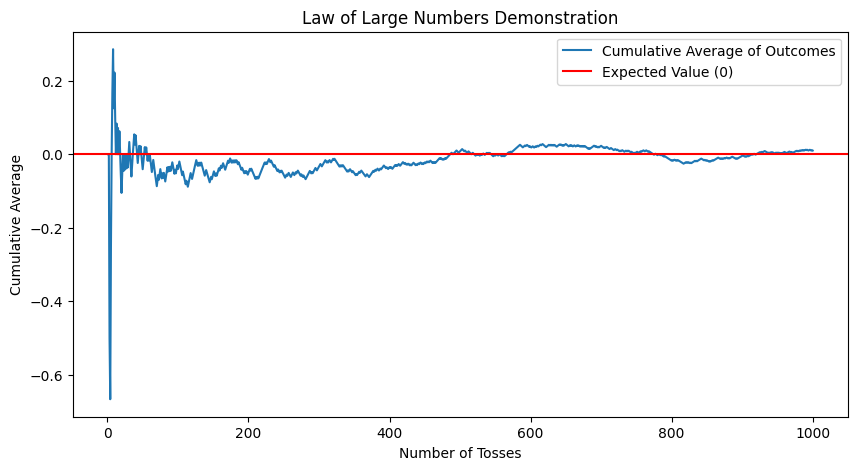

In [26]:
n = 1000  # Increase n for a clearer demonstration of LLN

# YOUR CODE HERE
x = [0] * n # replace this with the cumulative average: Sn/n
Sn = coinTossGame(n)
for i in range(1,n):
    x[i] = Sn[i]/i

# Plot the cumulative average against the number of tosses
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, n + 1), x, label = 'Cumulative Average of Outcomes')
plt.axhline(y = 0, color = 'r', linestyle = '-', label = 'Expected Value (0)')
plt.xlabel('Number of Tosses')
plt.ylabel('Cumulative Average')
plt.title('Law of Large Numbers Demonstration')
plt.legend()
plt.show()

### 2.1.3. Central Limit Theorem (0.5 points)
Verify empirically the central limit theorem, by running the game multiple times. For each game, save the total sum $S_n$ and plot the frequency of the values using the histogram function. What distribution does the histogram follow? How to scale this histogram to represent the standard distribution? How does this demonstrate the Central Limit Theorem?

<div style="background: #f6e28b; padding: 20px"><br>

<b>WRITE YOUR ANSWER TO THE QUESTION ABOVE HERE (DOUBLE-CLICK TO EDIT)

<br></div>

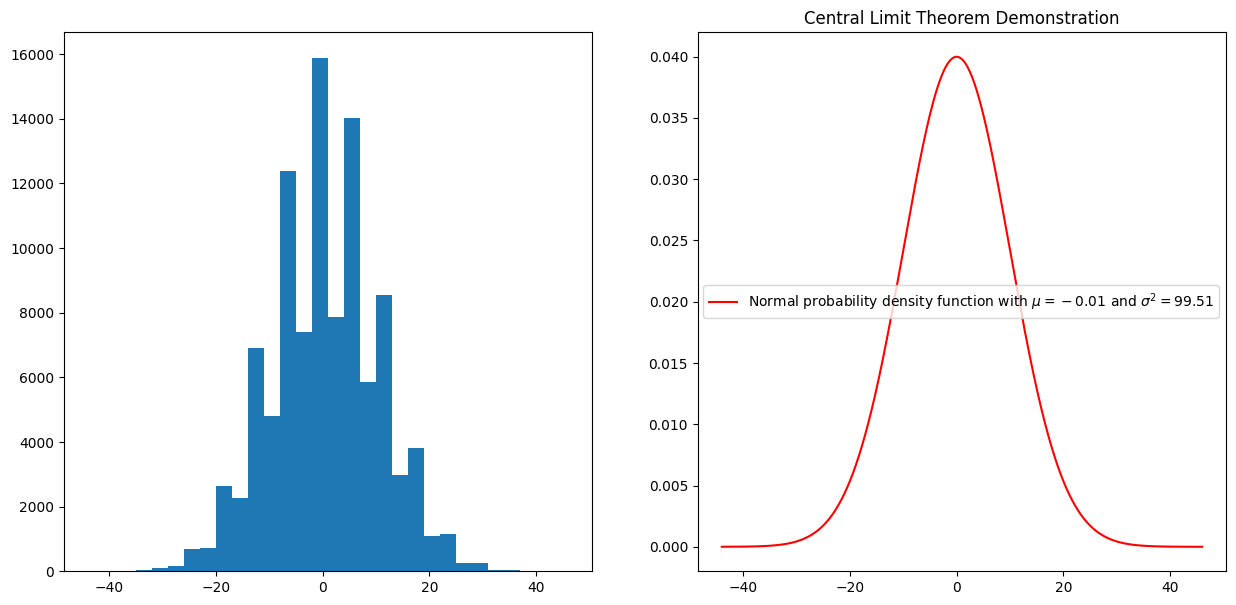

In [42]:
n_games = 100000
n = 100

sums = [0]*n_games # replace this with Sn from each game

for i in range(n_games):
    sums[i] = coinTossGame(n)[n-1]
    # sums[i] = coinTossGame(n)
hist, bin_edges = custom_histogram(sums, 30)

# Plotting the histogram as a probability distribution
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
bin_centers = (np.diff(bin_edges) / 2 + bin_edges[:-1])
ax[0].bar(bin_centers, hist, width = np.diff(bin_centers)[0])

actual_mean = np.mean(sums)
actual_var = np.var(sums)

# Plotting the actual probability density function
xx = np.linspace(min(sums), max(sums), 1000)
yy = [normal_pdf(x, actual_mean, actual_var) for x in xx]
plt.plot(xx, yy, color = "r", label = f"Normal probability density function with $\\mu = {actual_mean:0.2f}$ and $\\sigma^2 = {actual_var:0.2f}$")
plt.title('Central Limit Theorem Demonstration')
plt.legend()
plt.show()

### 2.2 Unit Simplex (1 point)
Sample from $X =\{(x_1, x_2, x_3)|0 ≤ x_i ≤ 1, x_1 + x_2 + x_3 = 1\}$ in a way that most of the samples are:
* concentrated in the center (0.25 points)
* uniformly distributed (0.25 points)

We will visualize the points in two dimensions. You can use the approach from the lectures, or try to come up with your own. You are allowed to use any external libraries for this experiment. Explain the solution you have implemented.

**Hint:** The distribution on a unit simplex is also known as the Dirichlet distribution

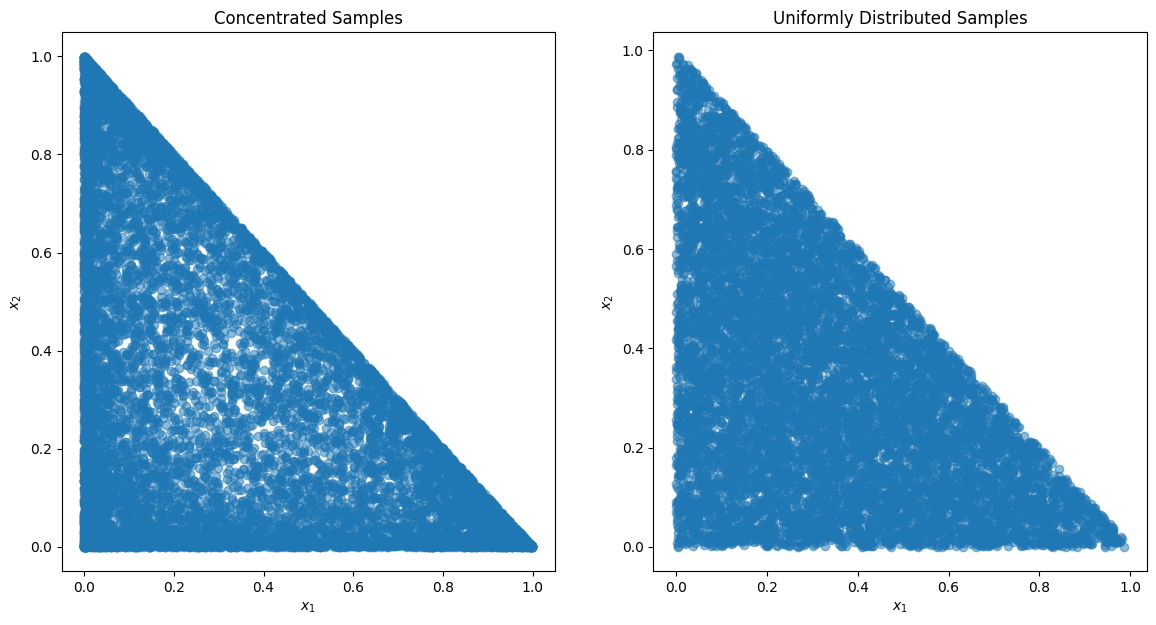

In [44]:
n_samples = 10000

samples_centered = np.zeros((n_samples, 3)) # Replace this with your concentrated samples
samples_uniform = np.zeros((n_samples, 3)) # Replace this with your uniform samples

# def sample_from_simplex(n_samples, alpha):
#     """
#     Sample from the unit simplex using the Dirichlet distribution.

#     Parameters:
#     - n_samples (int): Number of samples to generate.
#     - alpha (array-like): Parameters of the Dirichlet distribution.

#     Returns:
#     - ndarray: Array of shape (n_samples, 3) containing the sampled points.
#     """
#     samples = np.random.dirichlet(alpha, size=n_samples)
#     return samples
# samples_centered = sample_from_simplex(n_samples, (0.5,0.5,0.5))
# samples_uniform = sample_from_simplex(n_samples, (1,1,1))


# Visualization
fig, ax = plt.subplots(1, 2, figsize = (14, 7))

# Plot for concentrated samples
ax[0].scatter(samples_centered[:, 0], samples_centered[:, 1], alpha = 0.5)
ax[0].set_title('Concentrated Samples')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')

# Plot for uniformly distributed samples
ax[1].scatter(samples_uniform[:, 0], samples_uniform[:, 1], alpha = 0.5)
ax[1].set_title('Uniformly Distributed Samples')
ax[1].set_xlabel('$x_1$')
ax[1].set_ylabel('$x_2$')

plt.show()

## 3. Monte Carlo (4.5 points)

Monte Carlo (MC) methods are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. Their essential idea is using randomness to solve problems that might be deterministic in principle. They are often used in physical and mathematical problems and are most useful when it is difficult or impossible to use other approaches. MC methods are mainly used in three problem classes: optimization, numerical integration, and generating draws from a probability distribution.

### 3.0 Estimating $\pi$ using Monte Carlo (0.5 points)

We can approximate $\pi$, by drawing samples uniformly from inside a square and then counting how many of these points fall within the inscribed circle.

The circle is inscribed inside the square, which means that $l = 2r,$ where $r$ is radius of the circle. The area of the circle is given by $A_{circle} = \pi * r^2$ and the area of the square is given by $A_{square} = l ^ 2$. Now, we calculate the ratio of the two areas:
$$ \frac{A_{circle}}{A_{square}} = \frac{\pi * r^2}{l^2} = \frac{\pi * r^2}{(2r)^2} = \frac{\pi * r^2}{4r^2} = \frac{\pi}{4}$$

By rewriting the formula we can obtain the formula for $\pi$ in terms of the ratio:

$$ \pi = 4 * \frac{A_{circle}}{A_{square}} $$

By drawing samples uniformly, we can approximate this ratio by dividing the number of points that fall within the circle by the total number of points: 
$$\frac{A_{circle}}{A_{square}} \approx \frac{N_{in}}{N} $$ 

By replacing the ratio with our approximation in the formula for $\pi$, we will get the final approximation:

$$\pi \approx 4 * \frac{N_{in}}{N}$$

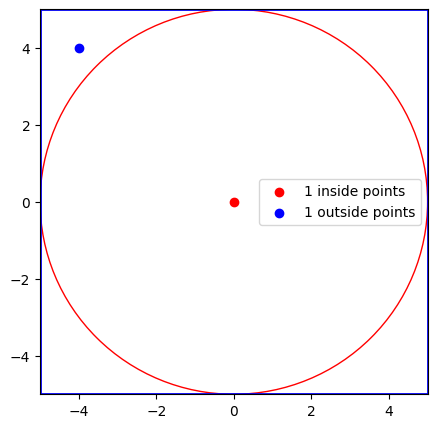

In [45]:
# You can just run this cell
def draw_circle_inside_square(ax, r, inside_points = None, outside_points = None):
    circle = plt.Circle((0, 0), r, color='r', fill = False)
    square = plt.Rectangle((-r, -r), 2 * r, 2 * r, fill = False, color = 'b', linewidth = 2)
    ax.add_patch(circle)
    ax.add_patch(square)
    ax.set_xlim([-r, r])
    ax.set_ylim([-r, r])
    if inside_points:
        ax.scatter([x[0] for x in inside_points], [x[1] for x in inside_points], color = 'r', linewidths = 1, label = f"{len(inside_points)} inside points")
    if outside_points:
        ax.scatter([x[0] for x in outside_points], [x[1] for x in outside_points], color = 'b', linewidths = 1, label = f"{len(outside_points)} outside points")
    ax.legend()
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
draw_circle_inside_square(ax, 5, inside_points = [(0, 0)], outside_points = [(-4, 4)])
plt.show()

In [70]:
def inside_circle(x, y, r):
    """
    Check if a point is inside a circle of radius r.

    Parameters:
    - x (float): x-coordinate of the point.
    - y (float): y-coordinate of the point.
    - r (float): radius of the circle.

    Returns:
    - bool: True if the point is inside the circle, False otherwise.
    """
    return x*x + y*y <= r*r

def calculate_approximation(N_in, N):
    """
    Calculate the approximation of pi using the ratio of points inside a circle to the total points.

    Parameters:
    - N_in (int): the number of points inside the circle.
    - N (int): the total number of points.

    Returns:
    - float: the approximation of pi.
    """
    return 4* N_in/N

def calculate_pi(N, r):
    """
    Calculate the approximation of pi using the Monte Carlo method.

    Parameters:
    - N (int): the number of points to generate.
    - r (float): the radius of the circle.

    Returns:
    - list of floats: the approximations of pi at each iteration.
    - list of tuples: the generated points.
    """
    N_in = 0
    approximations = []
    points = []
    for i in range(1, N+1):
        x = uniform_rv(-r, r)
        y = uniform_rv(-r, r)
        points.append((x, y))
        if inside_circle(x, y, r):
            N_in += 1
        
        approximations.append(calculate_approximation(N_in, i))
    return approximations, points


Last approximation: 3.124
actual pi:  3.141592653589793


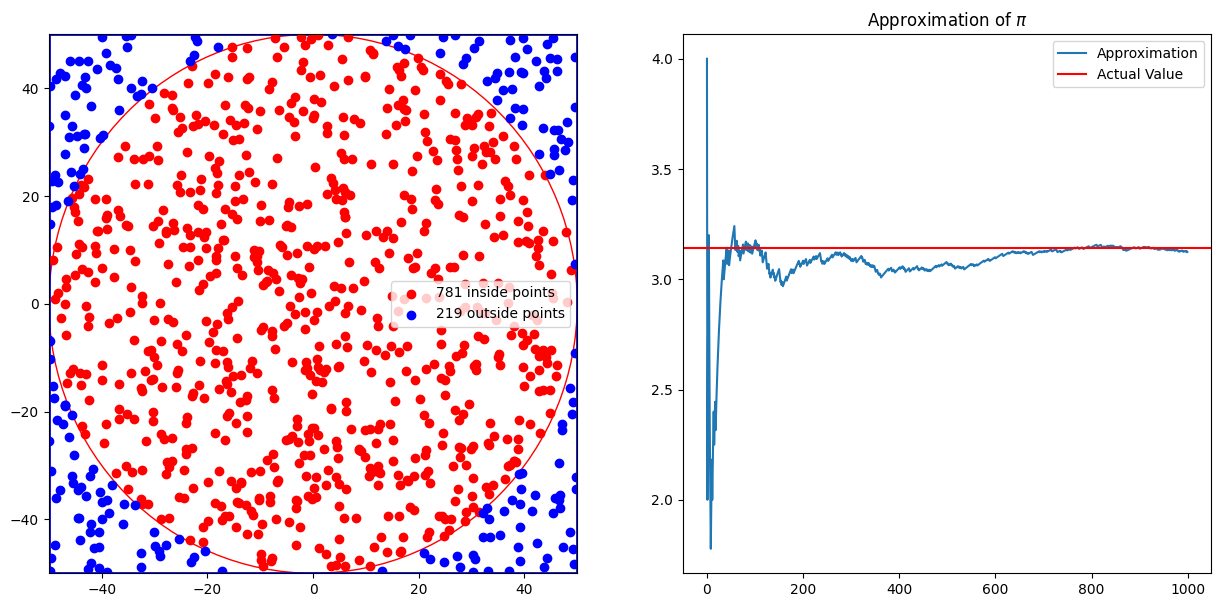

In [73]:
N = 1000
radius = 50
approximations, points = calculate_pi(N, radius)
print(f"Last approximation: {approximations[-1]}")
print("actual pi: ", math.pi)

# Separate outside and inside points
inside_points = [x for x in points if inside_circle(x[0], x[1], radius)]
outside_points = [x for x in points if not inside_circle(x[0], x[1], radius)]

# Draw the circle
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
draw_circle_inside_square(ax[0], radius, inside_points = inside_points, outside_points = outside_points)

# Draw the evolution of our approximation
ax[1].plot(approximations, label = "Approximation")

# Draw the value of 𝜋 as a horizontal red line
ax[1].axhline(y = np.pi, color = 'r', linestyle = '-', label = "Actual Value") 
ax[1].title.set_text('Approximation of $\\pi$')
ax[1].legend()
plt.show()

Copy the code from the previous cell and run multiple experiments for different values of N. What happens as the number of samples increases? How many iteration are needed to get a good approximation?

<div style="background: #f6e28b; padding: 20px"><br>

<b>WRITE YOUR ANSWER TO THE QUESTION ABOVE HERE (DOUBLE-CLICK TO EDIT)

<br></div>

Last approximation: 3.1436


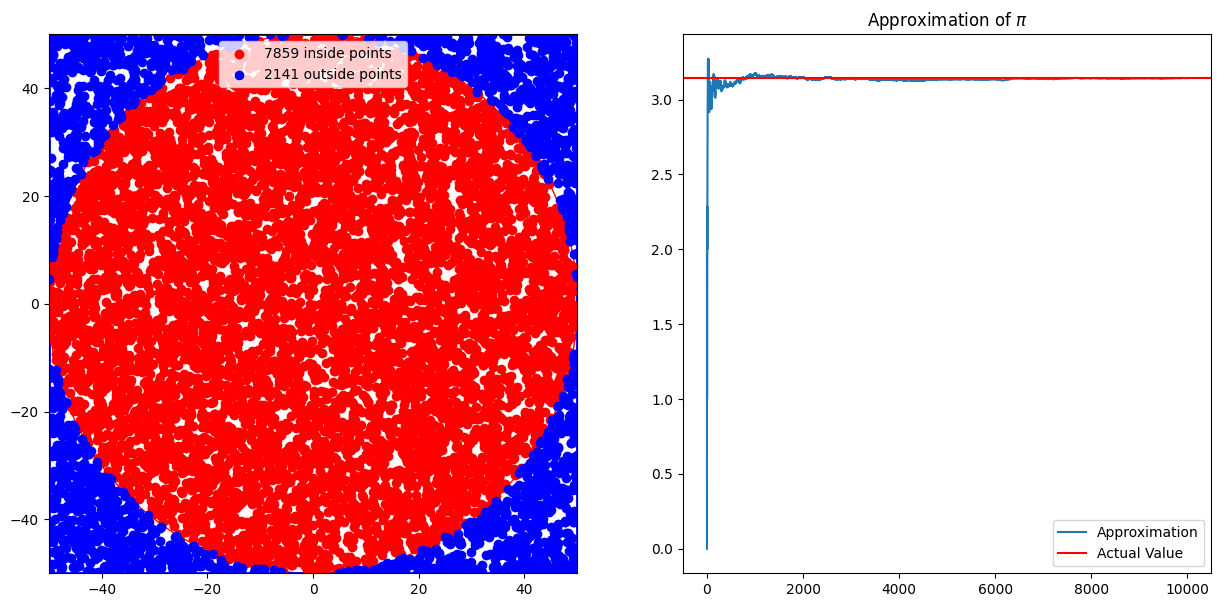

In [72]:
# EXPERIMENT 1
N = 10000
radius = 50
approximations, points = calculate_pi(N, radius)
print(f"Last approximation: {approximations[-1]}")
print("actual pi: ", math.pi)
# Separate outside and inside points
inside_points = [x for x in points if inside_circle(x[0], x[1], radius)]
outside_points = [x for x in points if not inside_circle(x[0], x[1], radius)]

# Draw the circle
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
draw_circle_inside_square(ax[0], radius, inside_points = inside_points, outside_points = outside_points)

# Draw the evolution of our approximation
ax[1].plot(approximations, label = "Approximation")

# Draw the value of 𝜋 as a horizontal red line
ax[1].axhline(y = np.pi, color = 'r', linestyle = '-', label = "Actual Value") 
ax[1].title.set_text('Approximation of $\\pi$')
ax[1].legend()
plt.show()

Last approximation: 3.13608
actual pi:  3.141592653589793


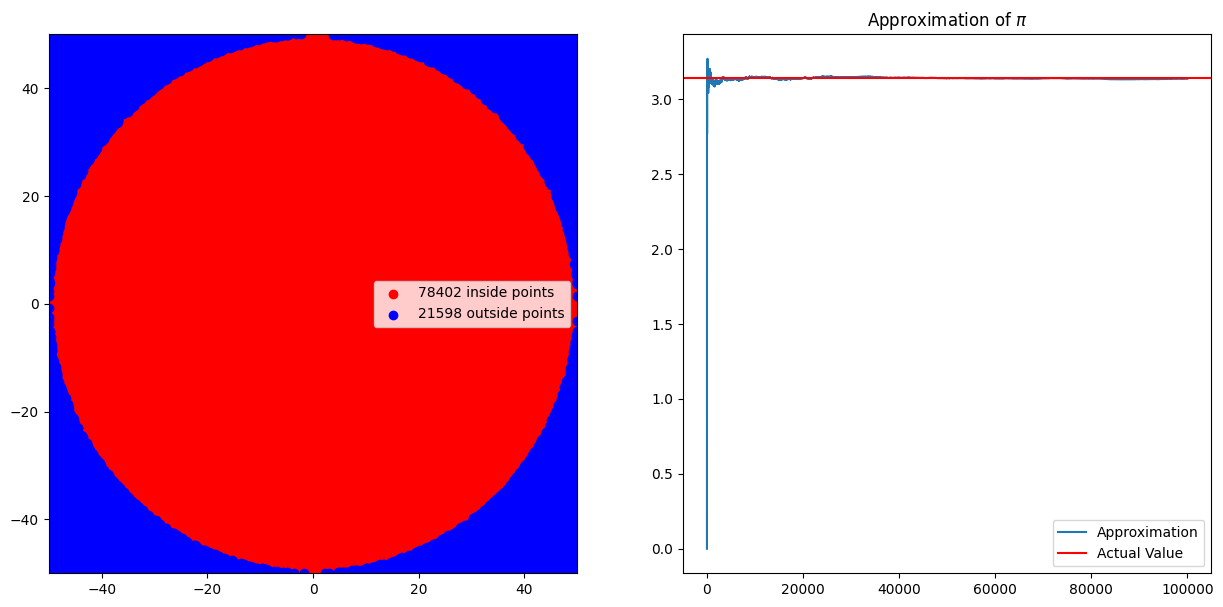

In [74]:
# EXPERIMENT 2
N = 100000
radius = 50
approximations, points = calculate_pi(N, radius)
print(f"Last approximation: {approximations[-1]}")
print("actual pi: ", math.pi)

# Separate outside and inside points
inside_points = [x for x in points if inside_circle(x[0], x[1], radius)]
outside_points = [x for x in points if not inside_circle(x[0], x[1], radius)]

# Draw the circle
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
draw_circle_inside_square(ax[0], radius, inside_points = inside_points, outside_points = outside_points)

# Draw the evolution of our approximation
ax[1].plot(approximations, label = "Approximation")

# Draw the value of 𝜋 as a horizontal red line
ax[1].axhline(y = np.pi, color = 'r', linestyle = '-', label = "Actual Value") 
ax[1].title.set_text('Approximation of $\\pi$')
ax[1].legend()
plt.show()

Last approximation: 3.142764
actual pi:  3.141592653589793


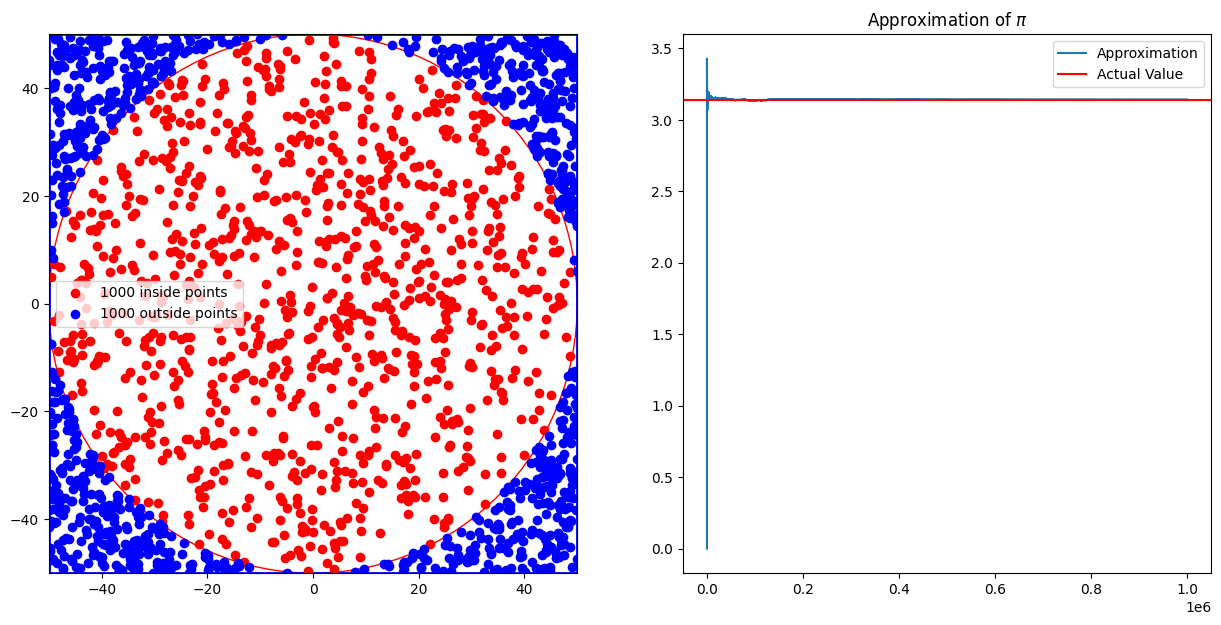

In [76]:
# EXPERIMENT 3
N = 1000000
radius = 50
approximations, points = calculate_pi(N, radius)
print(f"Last approximation: {approximations[-1]}")
print("actual pi: ", math.pi)

# Separate outside and inside points
inside_points = [x for x in points if inside_circle(x[0], x[1], radius)]
outside_points = [x for x in points if not inside_circle(x[0], x[1], radius)]

# Draw the circle
fig, ax = plt.subplots(1, 2, figsize = (15, 7))

#only 1000 points are shown, otherwise it is slow
draw_circle_inside_square(ax[0], radius, inside_points = inside_points[0:1000], outside_points = outside_points[0:1000])

# Draw the evolution of our approximation
ax[1].plot(approximations, label = "Approximation")

# Draw the value of 𝜋 as a horizontal red line
ax[1].axhline(y = np.pi, color = 'r', linestyle = '-', label = "Actual Value") 
ax[1].title.set_text('Approximation of $\\pi$')
ax[1].legend()
plt.show()

### 3.1 Importance Sampling

Importance sampling is a MC technique used for calculating the integral of a function by generating samples from a probability distribution that closely resembles the target function, often referred to as the posterior. This approach is useful when the function of interest is complex and can not be solved analytically.

Let's say we want to evaluate an integral $I = \int_a^b f(x) \,dx$, wich due to the nature of $f(x)$ can not be calculated analytically. We are going to approximate it with the expectation over a probability distribution $q(x)$.

$$ I = \int_a^b f(x) \,dx = \int_a^b f(x) \frac{q(x)}{q(x)} \,dx = \int_a^b \frac{f(x)}{q(x)} q(x) \,dx = \mathbb{E}_{q(x)} \left[ \frac{f(x)}{q(x)} \right] \approx \frac{1}{N}\sum_{i=1}^{N} \frac{f(x_i)}{q(x_i)}$$

Here's an outline of the steps involved in coding this approach:
1. **Define the target function $f(x)$**: This is the function inside the integral.
2. **Choose an importance distribution $q(x)$**: This should be a distribution over the same domain as the integral.
3. **Generate samples from $q(x)$**: Use random sampling methods to draw samples from $q(x)$.
4. **Calculate weights**: For each sample $x_i$, calculate the weight $w_i = \frac{f(x_i)}{q(x_i)}$.
5. **Estimate the integral**: The integral is approximated as the average of the weights $ \hat{I}  = \frac{1}{N}\sum_{i=1}^{N} w_i$.

**Note:** Most of the functions in this assignment are simple and can be solved directly. They are used to explain the concept and to check the results against known values.

### 3.1.1 Simple Case (0.5 points)

The simplest sampling technique is to draw the $x_i$ values from an uniform distribution $x_i \sim Uni(a,b) $, i.e. $q(x_i) = \frac{1}{b-a}$. Plugging this into the general formula gives us the following approximation:

$$ \hat{I} = \frac{1}{N}\sum_{i=1}^{N} \frac{f(x_i)}{\frac{1}{(a-b)}} = \frac{1}{N}\sum_{i=1}^{N} f(x_i)(a-b)$$

You can interpret this as taking the value $f(x)$ and scaling it by $b - a$. This can be visualised as taking multiple rectangles with height $H = f(x_i)$ and width $W = b - a$ at multiple locations, given by our sampler, and approxmiating the final area by the average of the rectangles' areas. You can check this visually by running the next cell.

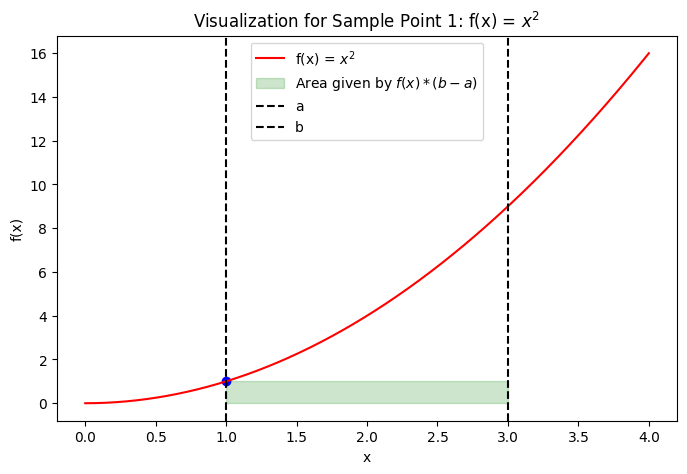

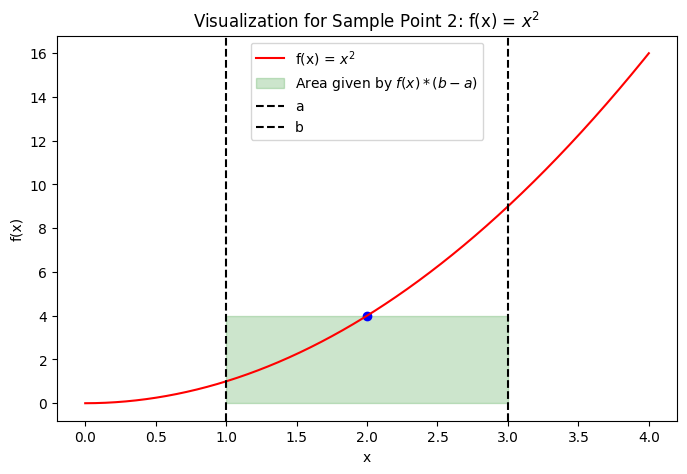

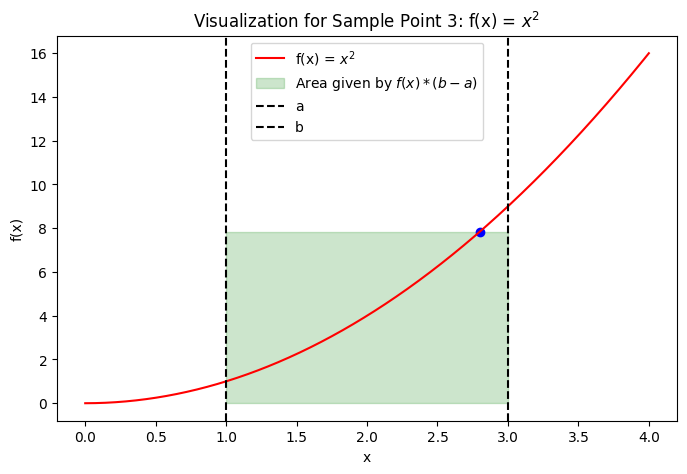

In [77]:
# Define the interval [a, b] and sample points
a, b = 1, 3
x_samples = np.array([1, 2, 2.8])
y_samples = x_samples ** 2

for i, (x_i, y_i) in enumerate(zip(x_samples, y_samples), start = 1):
    plt.figure(figsize = (8, 5))

    # Plot the function
    x = np.linspace(a - 1, b + 1, 1000)
    y = x ** 2
    plt.plot(x, y, 'r-', label = 'f(x) = $x^2$')

    # Plot rectangle for the current sample point
    rect = plt.Rectangle((a, 0), b - a, y_i, color = 'green', alpha = 0.2, label = 'Area given by $f(x) * (b - a)$')
    plt.gca().add_patch(rect)

    # Highlight the current sample point
    plt.scatter(x_i, y_i, color = 'blue')

    # Highlight the interval [a, b]
    plt.axvline(x = a, color = 'black', linestyle = '--', label = 'a')
    plt.axvline(x = b, color = 'black', linestyle = '--', label = 'b')

    plt.title(f'Visualization for Sample Point {i}: f(x) = $x^2$')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()

You are given the function $f_1(x) = x^2$. You are tasked with evaluating the integral $\int_a^b f_1(x) \,dx$ using importance sampling with the uniform distribution $q(x) = Uni(a,b)$ as you importance distribution.

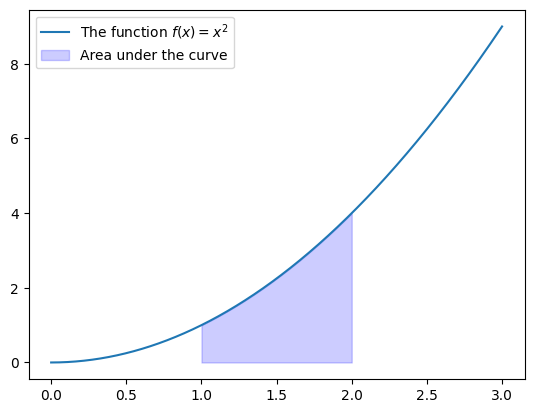

Your approximation : 2.344005513726005


In [79]:
def f1(x):
    return x ** 2


def simple_mc(N, f, a, b):
    """
    Estimate the integral of f over the interval [a, b] using simple Monte Carlo method (uniform sampling).

    Parameters:
    - N (int): the number of samples.
    - f (function): the function to integrate.
    - a (float): the start of the interval.
    - b (float): the end of the interval.

    Returns:
    - float: the estimated value of the integral.
    """
    res = 0
    for i in range(N):
        u = uniform_rv(a, b)
        res += f(u)*(b-a)
    return res/N

# Run test
a = 1
b = 2
N = 10000
xx = np.linspace(a - 1, b + 1, 10000)
yy = f1(xx)
plt.plot(xx, yy, label = "The function $f(x) = x^2$")
plt.fill_between(x = xx, y1 = f1(xx), 
        where = (a < xx) & (xx < b),
        color = "b",
        alpha = 0.2,
        label = "Area under the curve")
plt.legend()
plt.show()
approximation = simple_mc(N, f1, a, b)
print(f"Your approximation : {approximation}")

It it easy to check the answer analytically by solving the integral $\int_a^b x^2 \,dx =\left[\frac{x^3}{3}\right]_a^b = \frac{b^3 - a^3}{3}$.

In [80]:
def f1_integral(a, b):
    return (b ** 3 - a ** 3) / 3

# Run this cell to test your solution
def run_test(N, a, b):
    approx = simple_mc(N, f1, a, b)
    result = f1_integral(a, b)
    error = np.abs(result - approx)
    print(f"integral on [{a},{b}] as estimated from {N} Samples: {approx:.3f}; actual answer: {result:.3f}; error :{error:.3f}")
    return error

assert run_test(1000, 1, 2) < 0.1 
assert run_test(5000, -2, 1) < 0.1 
assert run_test(10000, -2, 2) < 0.5
assert run_test(10000, -5, 5) < 5
assert run_test(100000, 0, 15) < 10
assert run_test(1000000, -10, 10) < 5
assert run_test(10000000, 0, 50) < 25

integral on [1,2] as estimated from 1000 Samples: 2.329; actual answer: 2.333; error :0.004
integral on [-2,1] as estimated from 5000 Samples: 2.929; actual answer: 3.000; error :0.071
integral on [-2,2] as estimated from 10000 Samples: 5.315; actual answer: 5.333; error :0.019
integral on [-5,5] as estimated from 10000 Samples: 84.240; actual answer: 83.333; error :0.907
integral on [0,15] as estimated from 100000 Samples: 1129.338; actual answer: 1125.000; error :4.338


integral on [-10,10] as estimated from 1000000 Samples: 667.006; actual answer: 666.667; error :0.340
integral on [0,50] as estimated from 10000000 Samples: 41659.296; actual answer: 41666.667; error :7.370


### 3.1.2 General Case  (0.5 points)

We will consider a more complex function $f_2(x) = a * \exp \{ -\frac{1}{2 * \sigma ^ 2}(x - \mu)^2 \}$ which looks like a normal distribution. 
Note that due to the scaling factor $a$ this is not always a probability density function (only for $a = \frac{1}{\sigma * \sqrt{2 * \pi}}$).
Use importance sampling to evaluate the integral $\int_{-\infty}^{\infty} f_2(x) \,dx$.

**Hint:** Use the normal distribution as your importance distribution $q(x) = \mathcal{N}(\mu, \sigma^2)$.

Your approximation : 15.039769647787855


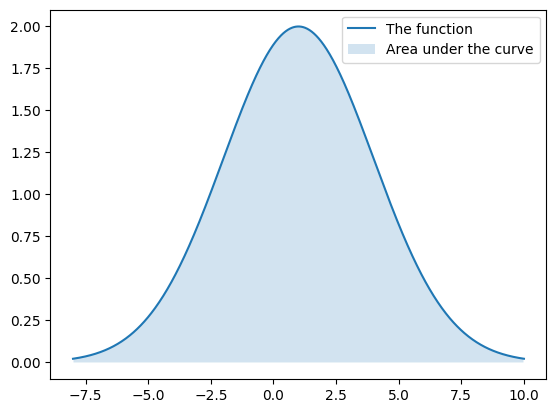

In [142]:
def f2(x, a, mu, sigma):
    return a * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

def importance_mc(N, a, mu, sigma):
    """
    Estimate the integral of f2 using importance sampling with q(x) being the normal distribution N(mu, sigma^2).
    
    Parameters:
    - N (int): the number of samples.
    - a (float): the scale of the function.
    - mu (float): the mean of the normal distribution.
    - sigma (float): the standard deviation of the normal distribution.

    Returns:
    - float: the estimated value of the integral.
    """
    res = 0
    for i in range(N):
        norm = normal_rv(mu, sigma**2)
        res += f2(norm, a, mu, sigma) / normal_pdf(norm, mu, sigma**2)
    return res/N

# Run your function
N = 10000
a = 2
mu = 1
sigma = 3
approximation = importance_mc(N, a, mu, sigma)
print(f"Your approximation : {approximation}")

# Plot the function and the area under the curve
x_min = mu - 3 * sigma
x_max = mu + 3 * sigma
xx = np.linspace(x_min, x_max, 1000) # generate array of x
yy = [f2(x, a, mu, sigma) for x in xx] # calculate the f2(x) for every x
plt.plot(xx,yy, label = "The function")
plt.fill_between(x = xx, y1 = yy, where = (x_min < xx) & (xx < x_max), alpha = 0.2, label = "Area under the curve")
plt.legend()
plt.show()

We can again compute the answer analytically by solving the integral $\int_{-\infty}^{\infty} f(x) \,dx = a \int_{-\infty}^{\infty} \exp \{ -\frac{1}{2 * \sigma ^ 2}(x - \mu)^2 \} \,dx = a * \sqrt{2 * \pi} * \sigma$.

In [143]:
# Run this cell to test your solution
def actual_f2(a, mu, sigma):
    return a * np.sqrt(2 * np.pi) * sigma

def run_test2(N, a, mu, sigma):
    approx = importance_mc(N, a, mu, sigma)
    answer = actual_f2(a, mu, sigma)
    error = np.abs(answer - approx)
    print(f"integral as estimated from {N} Samples: {approx:.5f}; actual answer: {answer:.5f}; error :{error}")
    return error

assert run_test2(1000, 2, 1, 3) < 1e-10
assert run_test2(1000, 5, 5, 2) < 1e-10
assert run_test2(1000, 5, 10, 4) < 1e-10
assert run_test2(1000, 10, 10, 10) < 1e-10

integral as estimated from 1000 Samples: 15.03977; actual answer: 15.03977; error :2.6645352591003757e-13
integral as estimated from 1000 Samples: 25.06628; actual answer: 25.06628; error :4.227729277772596e-13
integral as estimated from 1000 Samples: 50.13257; actual answer: 50.13257; error :8.455458555545192e-13
integral as estimated from 1000 Samples: 250.66283; actual answer: 250.66283; error :5.144329406903125e-12


### 3.1.3 Multidimensional Integral (1 point)

Use importance sampling to approximate the following integral by using the exponential distribution as your importance distribution $q(x)$ (you are allowed use external libraries in your implementation):

$$ I = \int_{0}^{\infty} \ldots \int_{0}^{\infty} \exp\left( -x_1 - \ldots - x_{10} - \frac{1}{2^{20} x_1 \ldots x_{10}} \right) x_{1}^{\frac{1}{11} - 1} x_{2}^{\frac{2}{11} - 1} \dots x_{10}^{\frac{10}{11} - 1}  dx_1 \ldots dx_{10} $$

**Hint:** The joint pdf of 10 independent exponential random variables $X_1, X_2, \ldots, X_{10}$, each having the same parameter $\lambda$, is the product of the individual pdfs $ f(x_1, x_2, \ldots, x_{10}) = \lambda e^{-\lambda x_1} \cdot \lambda e^{-\lambda x_2} \cdot \ldots \cdot \lambda e^{-\lambda x_{10}} = \lambda^{10} e^{-\lambda (x_1 + x_2 + \ldots + x_{10})} \quad \text{for each } x_i \geq 0 $

In [ ]:
# Define the number of samples
N = 10000

# Initialize the approximation
I_hat = 0

exp_pdf
for _ in range(N):
    I_hat += lambd**10*exp()
# YOUR CODE HERE

print(f"Approximation: I = {I_hat}")

### 3.2 Introduction to the Metropolis-Hastings Algorithm

The Metropolis-Hastings (M–H) algorithm is a simple yet powerful approach for Markov Chain Monte Carlo (MCMC) sampling, designed to sample from a probability distribution when direct sampling is difficult. This is particularly useful in Bayesian inference, where the goal is to sample from the posterior distribution of parameters given some observed data. The algorithm can be broken down into several key components and steps:

1. **Initialization**: Start with an initial parameter value $q_0$.

2. **Proposal Distribution**: At each step, generate a new candidate parameter value $q'$ from a proposal distribution $Q(q'|q)$, which depends on the current parameter value $q$. This proposal distribution must be symmetric but can take various forms, such as a Gaussian distribution centered at the current parameter value.

3. **Acceptance Probability**: The algorithm then calculates the acceptance probability $A(q'|q)$, which is determined by the ratio of the target distributions evaluated at the new and current parameter values, as well as the proposal distribution for the proposed and current states. For the Metropolis-Hastings algorithm, the acceptance probability is given by:
   $$
   A(q'|q) = \min\left(1, \frac{P(q')Q(q|q')}{P(q)Q(q'|q)}\right)
   $$
   Here, $P(q)$ is the target distribution from which we wish to sample (e.g., the posterior distribution in Bayesian inference), and $Q(q'|q)$ is the proposal distribution. In the Metropolis algorithm, a special case of Metropolis-Hastings, the proposal distribution is symmetric, simplifying the acceptance probability to:
   $$
   A(q'|q) = \min\left(1, \frac{P(q')}{P(q)}\right)
   $$

4. **Sampling Step**: A new sample value $q'$ is accepted with the probability $A(q'|q)$. If $q'$ is rejected, the algorithm retains the current value $q$ as the next sample. This decision is made by drawing a uniform random number $u$ in the range $[0,1]$ and accepting $q'$ if $u < A(q'|q)$.

5. **Iteration**: Repeat steps 2-4 for a large number of iterations. After a burn-in period, the sampled values of $q$ approximate the desired target distribution.

6. **Convergence and Tuning**: The efficiency of the Metropolis-Hastings algorithm depends on the choice of the proposal distribution. Tuning the parameters of this distribution (e.g., the variance of a Gaussian proposal) is crucial for achieving efficient sampling and ensuring the chain explores the parameter space adequately.

The Metropolis-Hastings algorithm is powerful because it allows for sampling from complex, multi-dimensional distributions that are common in statistical inference problems. However, its performance heavily depends on the choice of the proposal distribution and the starting point of the chain. Proper tuning and diagnostics are essential for ensuring that the sampled distribution accurately represents the target distribution. You can read more in this [article by Hogg & Foreman-Mackey](https://iopscience-iop-org.tudelft.idm.oclc.org/article/10.3847/1538-4365/aab76e/meta). 

### 3.2.1 Sample from a Gaussian Distribution (0.5 points)

Please implement the M-H algorithm bellow and test it on the target distribution $q = \mathcal{N}(\mu,\,\sigma^{2})$, with $\mu = 2$ and $\sigma^{2} = 2$. This is Problem 2 from [Hogg & Foreman-Mackey](https://iopscience-iop-org.tudelft.idm.oclc.org/article/10.3847/1538-4365/aab76e/meta).

In [ ]:
def f3(x_values):
    # Parameters for the normal target distribution
    mu = 2 # Mean
    var = 2  # Variance
    return (1 / np.sqrt(2 * np.pi * var)) * np.exp(-0.5 * ((x_values - mu) ** 2 / var))

def metropolis_hastings(n_steps, q):
    """
    Perform Metropolis-Hastings sampling to generate samples from the target distribution q.
    
    Parameters:
    - n_steps (int): the number of MCMC steps.
    - q (function): the target distribution.

    Returns:
    - list of floats: the generated samples.
    """
    samples = []
    
    # YOUR CODE HERE

    return samples


n_steps = 10000  # Number of MCMC steps
samples = metropolis_hastings(n_steps, q = f3)

# Plotting the results
plt.figure(figsize = (10, 6))
plt.hist(samples, bins = 50, density = True, label = 'M-H Samples')

# Plotting the true density
x_values = np.linspace(min(samples) if samples else 0, max(samples) if samples else 10, 1000)
true_density = f3(x_values)
plt.plot(x_values, true_density, 'r-', lw = 2, label = 'True Density')
plt.title('Metropolis-Hastings Sampling')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()


### 3.2.2 Sample from an Uniform Distribution (0.5 points)

Now use the M-H algorithm to sample from an uniform distribution between 3 and 7  as your target, denoted here as `f4`. This is Problem 3 from [Hogg & Foreman-Mackey](https://iopscience-iop-org.tudelft.idm.oclc.org/article/10.3847/1538-4365/aab76e/meta).

**Hint**: If you run into numerical instabilities, you need to replace the division with the difference of log probabilities in your M-H algorithm, as described by the last paragraph from Section 3 in [Hogg & Foreman-Mackey](https://iopscience-iop-org.tudelft.idm.oclc.org/article/10.3847/1538-4365/aab76e/meta).

In [ ]:
def f4(x_value):
    x_min = 3
    x_max = 7
    if x_min <= x_value and x_value <= x_max:
        return 1 / (x_max - x_min) 
    return 0

def metropolis_hastings(n_steps,q):
    """
    Perform Metropolis-Hastings sampling to generate samples from the target distribution q.
    Use the log of the target distribution to avoid underflow.
    
    Parameters:
    - n_steps (int): the number of MCMC steps.
    - q (function): the target distribution.

    Returns:
    - list of floats: the generated samples.
    """
    # Sampler parameters
    
    samples = []
    
    # YOUR CODE HERE

    return samples

n_steps = 100000  # Number of MCMC steps
samples = metropolis_hastings(n_steps, q = f4)

# Plotting the results
plt.figure(figsize = (10, 6))
plt.hist(samples, bins = 50, density = True, label = "M-H Samples")

# Plotting the true density
x_values = np.linspace(0, 10, 1000)
true_density = [f4(x) for x in x_values]
plt.plot(x_values, true_density, 'r-', lw = 2, label='True Density')
plt.title('Metropolis-Hastings Sampling')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()


### 3.3 Integral using the M-H algorithm (1 point)

Now that you have a working M-H sampler, we can use it to calculate the integral of `fun` given a target density `target`.

**Hint:** Instead of sampling directly from the target density, you will use the M-H algorithm to sample from the `target` density and then calculate the integral using the importance sampling formula.

In [ ]:
def calculate_integral_MH(fun, target):
    """
    Calculate the integral of a function using the Metropolis-Hastings algorithm for sampling

    Parameters:
    - fun (function): the function to integrate.
    - target (function): the target distribution.

    Returns:
    - float: the estimated value of the integral.
    """
    # YOUR CODE HERE
    pass

approximation = calculate_integral_MH(f1, f3)
print(f"Your approximation : {approximation}")

We can test the function by integrating `f3` and `f4` from the previous exercises, using them as both the target function and the target density distribution. The result of the integrals should be `1`, as the integral of a probability density function over its domain is always one.

In [ ]:
approximation = calculate_integral_MH(f3, f3) # approximate the integral of f3 using f3 as the target distribution
result = 1 # The integral of f3 is 1
print(f"Your approximation : {approximation}; actual answer: {result}; error :{np.abs(result - approximation)}")
approximation = calculate_integral_MH(f4, f4)
print(f"Your approximation : {approximation}; actual answer: {result}; error :{np.abs(result - approximation)}")

We can also test the function by integrating $f_1(x) = x^2$ over the interval defined by $f_4(x) = 1/4$ for  $x \in [3,7]$.

In [ ]:
approximation = calculate_integral_MH(f1, f4) # approximate the integral of f1 using f4 as the target distribution
result = f1_integral(3, 7) # actual answer
print(f"Your approximation : {approximation}; actual answer: {result}; error :{np.abs(result - approximation)}")

To use `calculate_integral_MH` on any function, we need to adapt the function to accept a single argument, `x`. This can be accomplished through the use of a lambda function.

In [ ]:
def f2_lambda(a, mu, sigma):
    return lambda x : a * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

def f2_pdf(mu, sigma):
    return lambda x : normal_pdf(x, mu, sigma ** 2)

def f2_integral(a, mu, sigma):
    return a * np.sqrt(2 * np.pi) * sigma

a = 3
mu = 1
sigma = 2
approximation = calculate_integral_MH(f2_lambda(a, mu, sigma), f2_pdf(mu, sigma))
result = f2_integral(a, mu, sigma)
print(f"Your approximation : {approximation}; actual answer: {result}; error :{np.abs(result - approximation)}")